## Ames Data Cleaning and Standardization

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

In [2]:
kaggle_train_raw = pd.read_csv('../../NYCDSA/Project 3 - Machine Learning/data/train.csv', index_col=0)
kaggle_test_raw = pd.read_csv('../../NYCDSA/Project 3 - Machine Learning/data/test.csv', index_col=0)

In [3]:
pd.options.display.max_columns = 300

Backup so we can always start over

In [4]:
kr_train = kaggle_train_raw.copy()
kr_test = kaggle_test_raw.copy()

Remove spaces so column names are easier to work with

In [5]:
kr_train.columns = kr_train.columns.str.replace(" ", "_")
kr_test.columns = kr_test.columns.str.replace(" ", "_")

Impute all missing data so no NaN valus remain

In [6]:
kr_train['PoolQC'] = kr_train['PoolQC'].replace(np.nan, 'NA')
kr_train['Alley'] = kr_train['Alley'].replace(np.nan, 'NA')
kr_train['Fence'] = kr_train['Fence'].replace(np.nan, 'NA')
kr_train['FireplaceQu'] = kr_train['FireplaceQu'].replace(np.nan, 'NA')
kr_train['GarageFinish'] = kr_train['GarageFinish'].replace(np.nan, 'NA')
kr_train['GarageType'] = kr_train['GarageType'].replace(np.nan, 'NA')
kr_train['GarageQual'] = kr_train['GarageQual'].replace(np.nan, 'NA')
kr_train['GarageCond'] = kr_train['GarageCond'].replace(np.nan, 'NA')
kr_train['GarageCars'] = kr_train['GarageCars'].replace(np.nan, 0)
kr_train['GarageArea'] = kr_train['GarageArea'].replace(np.nan, 0)
kr_train['BsmtExposure'] = kr_train['BsmtExposure'].replace(np.nan, 'NA')
kr_train['BsmtFinType2'] = kr_train['BsmtFinType2'].replace(np.nan, 'NA')
kr_train['BsmtCond'] = kr_train['BsmtCond'].replace(np.nan, 'NA')
kr_train['BsmtQual'] = kr_train['BsmtQual'].replace(np.nan, 'NA')
kr_train['BsmtFinType1'] = kr_train['BsmtFinType1'].replace(np.nan, 'NA')
kr_train['BsmtFullBath'] = kr_train['BsmtFullBath'].replace(np.nan, 0)
kr_train['BsmtHalfBath'] = kr_train['BsmtHalfBath'].replace(np.nan, 0)
kr_train['TotalBsmtSF'] = kr_train['TotalBsmtSF'].replace(np.nan, 0)
kr_train['BsmtFinSF2'] = kr_train['BsmtFinSF2'].replace(np.nan, 0)
kr_train['BsmtUnfSF'] = kr_train['BsmtUnfSF'].replace(np.nan, 0)
kr_train['BsmtFinSF1'] = kr_train['BsmtFinSF1'].replace(np.nan, 0)
kr_train['MiscFeature'] = kr_train['MiscFeature'].replace(np.nan, 'NA')
kr_train['MasVnrArea'] = kr_train['MasVnrArea'].replace(np.nan, 0)
kr_train['MasVnrType'] = kr_train['MasVnrType'].replace(np.nan, 'None')
kr_train['Electrical'] = kr_train['Electrical'].replace(np.nan, 'SBrkr')

kr_test['PoolQC'] = kr_test['PoolQC'].replace(np.nan, 'NA')
kr_test['Alley'] = kr_test['Alley'].replace(np.nan, 'NA')
kr_test['Fence'] = kr_test['Fence'].replace(np.nan, 'NA')
kr_test['FireplaceQu'] = kr_test['FireplaceQu'].replace(np.nan, 'NA')
kr_test['GarageFinish'] = kr_test['GarageFinish'].replace(np.nan, 'NA')
kr_test['GarageType'] = kr_test['GarageType'].replace(np.nan, 'NA')
kr_test['GarageQual'] = kr_test['GarageQual'].replace(np.nan, 'NA')
kr_test['GarageCond'] = kr_test['GarageCond'].replace(np.nan, 'NA')
kr_test['GarageCars'] = kr_test['GarageCars'].replace(np.nan, 0)
kr_test['GarageArea'] = kr_test['GarageArea'].replace(np.nan, 0)
kr_test['BsmtExposure'] = kr_test['BsmtExposure'].replace(np.nan, 'NA')
kr_test['BsmtFinType2'] = kr_test['BsmtFinType2'].replace(np.nan, 'NA')
kr_test['BsmtCond'] = kr_test['BsmtCond'].replace(np.nan, 'NA')
kr_test['BsmtQual'] = kr_test['BsmtQual'].replace(np.nan, 'NA')
kr_test['BsmtFinType1'] = kr_test['BsmtFinType1'].replace(np.nan, 'NA')
kr_test['BsmtFullBath'] = kr_test['BsmtFullBath'].replace(np.nan, 0)
kr_test['BsmtHalfBath'] = kr_test['BsmtHalfBath'].replace(np.nan, 0)
kr_test['TotalBsmtSF'] = kr_test['TotalBsmtSF'].replace(np.nan, 0)
kr_test['BsmtFinSF2'] = kr_test['BsmtFinSF2'].replace(np.nan, 0)
kr_test['BsmtUnfSF'] = kr_test['BsmtUnfSF'].replace(np.nan, 0)
kr_test['BsmtFinSF1'] = kr_test['BsmtFinSF1'].replace(np.nan, 0)
kr_test['MiscFeature'] = kr_test['MiscFeature'].replace(np.nan, 'NA')
kr_test['MasVnrArea'] = kr_test['MasVnrArea'].replace(np.nan, 0)
kr_test['MasVnrType'] = kr_test['MasVnrType'].replace(np.nan, 'None')
kr_test['Electrical'] = kr_test['Electrical'].replace(np.nan, 'SBrkr')



In [7]:
kr_train['LotFrontage'].value_counts()
kr_train[['LotConfig', 'LotFrontage']].drop_duplicates()
kr_train[kr_train['LotFrontage'].isnull()][['LotConfig', 'LotFrontage', 'LotShape']].drop_duplicates()
kr_train.groupby(['LotConfig', 'LotShape'])['LotFrontage'].agg(['count', 'mean', 'min', 'max'])
lot_dict = kr_train.groupby(['LotConfig', 'LotShape'])['LotFrontage'].agg(['mean']).to_dict()['mean']
impute_index = kr_train['LotFrontage'].isnull()
kr_train.loc[impute_index, 'LotFrontage'] = kr_train[impute_index].apply(lambda x:lot_dict[(x['LotConfig'], x['LotShape'])], axis=1)


kr_test['LotFrontage'].value_counts()
kr_test[['LotConfig', 'LotFrontage']].drop_duplicates()
kr_test[kr_test['LotFrontage'].isnull()][['LotConfig', 'LotFrontage', 'LotShape']].drop_duplicates()
kr_test.groupby(['LotConfig', 'LotShape'])['LotFrontage'].agg(['count', 'mean', 'min', 'max'])
lot_dict = kr_test.groupby(['LotConfig', 'LotShape'])['LotFrontage'].agg(['mean']).to_dict()['mean']
impute_index = kr_test['LotFrontage'].isnull()
kr_test.loc[impute_index, 'LotFrontage'] = kr_test[impute_index].apply(lambda x:lot_dict[(x['LotConfig'], x['LotShape'])], axis=1)



In [8]:
kr_train['HasGarage'] = 0
kr_train.loc[~kr_train['GarageYrBlt'].isnull(), 'HasGarage'] = 1
kr_train['GarageYrBlt'] = kr_train['GarageYrBlt'].replace(np.nan, kr_train['GarageYrBlt'].min() - 1)
min_max_scaler = preprocessing.MinMaxScaler()
kr_train['GarageYrBlt'] = min_max_scaler.fit_transform(kr_train[['GarageYrBlt']])

kr_test['HasGarage'] = 0
kr_test.loc[~kr_test['GarageYrBlt'].isnull(), 'HasGarage'] = 1
kr_test['GarageYrBlt'] = kr_test['GarageYrBlt'].replace(np.nan, kr_test['GarageYrBlt'].min() - 1)
min_max_scaler = preprocessing.MinMaxScaler()
kr_test['GarageYrBlt'] = min_max_scaler.fit_transform(kr_test[['GarageYrBlt']])


In [9]:
lfa = kr_train[kr_train['LotShape'] == 'Reg']['LotFrontage'].agg(['mean'])

kr_train['LotFrontage'] = kr_train['LotFrontage'].replace(np.nan, lfa[0])

In [10]:
kr_test.loc[(kr_test['MSZoning'].isnull()) & (kr_test['Neighborhood'] ==  'Mitchel'), 'MSZoning'] = str(pd.DataFrame(kr_test[kr_test['Neighborhood'] == 'Mitchel']['MSZoning'].value_counts()).index[0])
kr_test.loc[(kr_test['MSZoning'].isnull()) & (kr_test['Neighborhood'] ==  'IDOTRR'), 'MSZoning'] = str(pd.DataFrame(kr_test[kr_test['Neighborhood'] == 'IDOTRR']['MSZoning'].value_counts()).index[0])

ir_lf = kr_test[kr_test['LotShape'] == 'IR2']['LotFrontage'].agg('mean')
kr_test['LotFrontage'] = kr_test['LotFrontage'].replace(np.nan, ir_lf)

kr_test['Utilities'] = kr_test['Utilities'].replace(np.nan, 'AllPub')

kr_test['Exterior1st'] = kr_test['Exterior1st'].replace(np.nan, 'VinylSd')
kr_test['Exterior2nd'] = kr_test['Exterior2nd'].replace(np.nan, 'VinylSd')

kr_test[kr_test['KitchenQual'].isnull()]
kr_test.groupby(['BldgType', 'HouseStyle'])['Exterior1st'].agg(['count'])
kr_test[(kr_test['Exterior1st'] == 'VinylSd') & (kr_test['Exterior2nd'] == 'VinylSd')]
kr_test['KitchenQual'].value_counts()

kr_test['KitchenQual'] = kr_test['KitchenQual'].replace(np.nan, 'TA')

kr_test['Functional'] = kr_test['Functional'].replace(np.nan, 'Typ')

kr_test['SaleType'] = kr_test['SaleType'].replace(np.nan, 'WD')


In [11]:
# kr_train = kr_train.loc[kr_train.isna().any(axis=1)]

# np.any(np.isnan(kr_train))
# np.all(np.isfinite(kr_train))

for feature in kr_test:
    if kr_test[feature].isna().sum() > 0:
        print( f' {feature} has {kr_test[feature].isna().sum()} missing values' )

Remove outliers and other records that won't be relevant to our goal

In [12]:
kr_train_trimmed = kr_train.copy()
kr_test_trimmed = kr_test.copy()

### Feature Encoding

General Ordinal function

In [13]:
def condition_quality_ordinals(df, col_list):
    for col in col_list:
        df[col] = df[col].map({'NA' : 0.0, 'Po' : 1.0, 'Fa' : 4.0, 'TA' : 9.0, 'Gd' : 16.0, 'Ex' : 25.0})
        df[col] = pd.to_numeric(df[col])
        df[col] = df[col].fillna(0)


In [14]:
ames_encoded = kr_train_trimmed.copy()
ames_encoded_test = kr_test_trimmed.copy()

Garage Features

In [15]:
condition_quality_ordinals(ames_encoded, ['GarageCond', 'GarageQual'])

dummy = pd.get_dummies(ames_encoded['GarageType'], prefix='GarageType')
dummy.drop('GarageType_Attchd', axis=1, inplace=True)
ames_encoded = ames_encoded.drop('GarageType', axis=1)
ames_encoded = pd.concat([ames_encoded, dummy], axis=1)

ames_encoded['GarageFinish'] = ames_encoded['GarageFinish'].map({'NA' : 0.0, 'Unf' : 1.0, 'RFn' : 2.0, 'Fin' : 3.0})
ames_encoded['GarageFinish'] = pd.to_numeric(ames_encoded['GarageFinish'])
ames_encoded['GarageFinish'] = ames_encoded['GarageFinish'].fillna(0)


In [16]:
condition_quality_ordinals(ames_encoded_test, ['GarageCond', 'GarageQual'])

dummy = pd.get_dummies(ames_encoded_test['GarageType'], prefix='GarageType')
dummy.drop('GarageType_Attchd', axis=1, inplace=True)
ames_encoded_test = ames_encoded_test.drop('GarageType', axis=1)
ames_encoded_test = pd.concat([ames_encoded_test, dummy], axis=1)

ames_encoded_test['GarageFinish'] = ames_encoded_test['GarageFinish'].map({'NA' : 0.0, 'Unf' : 1.0, 'RFn' : 2.0, 'Fin' : 3.0})
ames_encoded_test['GarageFinish'] = pd.to_numeric(ames_encoded_test['GarageFinish'])
ames_encoded_test['GarageFinish'] = ames_encoded_test['GarageFinish'].fillna(0)


Basement Features

In [17]:
condition_quality_ordinals(ames_encoded, ['BsmtCond', 'BsmtQual'])

ames_encoded['BsmtExposure'] = ames_encoded['BsmtExposure'].map({'NA' : 0.0, 'No' : 1.0, 'Mn' : 2.0, 'Av' : 3.0, 'Gd' : 4.0})
ames_encoded['BsmtExposure'] = pd.to_numeric(ames_encoded['BsmtExposure'])

ames_encoded['BsmtFinType1'] = ames_encoded['BsmtFinType1'].map({'NA' : 0.0, 'Unf' : 1.0, 'LwQ' : 2.0, 'Rec' : 3.0, 'BLQ' : 4.0, 'ALQ' : 5.0, 'GLQ' : 6.0})
ames_encoded['BsmtFinType1'] = pd.to_numeric(ames_encoded['BsmtFinType1'])

ames_encoded['BsmtFinType2'] = ames_encoded['BsmtFinType2'].map({'NA' : 0.0, 'Unf' : 1.0, 'LwQ' : 2.0, 'Rec' : 3.0, 'BLQ' : 4.0, 'ALQ' : 5.0, 'GLQ' : 6.0})
ames_encoded['BsmtFinType2'] = pd.to_numeric(ames_encoded['BsmtFinType2'])


In [18]:
condition_quality_ordinals(ames_encoded_test, ['BsmtCond', 'BsmtQual'])

ames_encoded_test['BsmtExposure'] = ames_encoded_test['BsmtExposure'].map({'NA' : 0.0, 'No' : 1.0, 'Mn' : 2.0, 'Av' : 3.0, 'Gd' : 4.0})
ames_encoded_test['BsmtExposure'] = pd.to_numeric(ames_encoded_test['BsmtExposure'])

ames_encoded_test['BsmtFinType1'] = ames_encoded_test['BsmtFinType1'].map({'NA' : 0.0, 'Unf' : 1.0, 'LwQ' : 2.0, 'Rec' : 3.0, 'BLQ' : 4.0, 'ALQ' : 5.0, 'GLQ' : 6.0})
ames_encoded_test['BsmtFinType1'] = pd.to_numeric(ames_encoded_test['BsmtFinType1'])

ames_encoded_test['BsmtFinType2'] = ames_encoded_test['BsmtFinType2'].map({'NA' : 0.0, 'Unf' : 1.0, 'LwQ' : 2.0, 'Rec' : 3.0, 'BLQ' : 4.0, 'ALQ' : 5.0, 'GLQ' : 6.0})
ames_encoded_test['BsmtFinType2'] = pd.to_numeric(ames_encoded_test['BsmtFinType2'])



Remaining Feature Encoding

In [19]:
# ames_encoded['Conditions'] = ames_encoded['Condition1'] + '_' + ames_encoded['Condition2']
# ames_encoded_test['Conditions'] = ames_encoded_test['Condition1'] + '_' + ames_encoded_test['Condition2']

# ames_encoded.drop(['Condition1', 'Condition2'], axis=1, inplace=True)
# ames_encoded_test.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

In [20]:
# Do we want to combine Condition_1 and Condition_2 in some way?
# Try Street as Binary

encode_col = ['MSZoning', 'Street', 'LotConfig', 'LandSlope', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'Exterior2nd', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MoSold', 'YrSold', 'MSSubClass']
# encode_col = ['MS_Zoning', 'Street', 'Lot_Shape', 'Land_Contour', 'Lot_Config', 'Land_Slope', 'Roof_Style', 'Exterior_1st', 'Mas_Vnr_Type', 'Foundation', 'Heating', 'Electrical', 'Condition_1', 'Condition_2', 'Bldg_Type', 'Roof_Matl', 'Exterior_2nd', 'Fence', 'Misc_Feature', 'Sale_Type', 'Sale_Condition']
for feature in encode_col:
    most_common = str(pd.DataFrame(ames_encoded[feature].value_counts()).index[0])
    dummy = pd.get_dummies(ames_encoded[feature], prefix=feature)
    dummy.drop(feature+"_"+most_common, axis=1, inplace=True)
    ames_encoded = ames_encoded.drop(feature, axis=1)
    ames_encoded = pd.concat([ames_encoded, dummy], axis=1)
    
    dummy = pd.get_dummies(ames_encoded_test[feature], prefix=feature)
    dummy.drop(feature+"_"+most_common, axis=1, inplace=True)
    ames_encoded_test = ames_encoded_test.drop(feature, axis=1)
    ames_encoded_test = pd.concat([ames_encoded_test, dummy], axis=1)


In [22]:
# Does it matter for these options which don't have an NA value?
# They will start at 1, not 0

condition_quality_ordinals(ames_encoded, ['KitchenQual', 'FireplaceQu', 'HeatingQC', 'ExterQual', 'ExterCond', 'PoolQC'])

ames_encoded['CentralAir'] = ames_encoded['CentralAir'].map({'N' : 0.0, 'Y' : 1.0})
ames_encoded['CentralAir'] = pd.to_numeric(ames_encoded['CentralAir'])

ames_encoded['Alley'] = ames_encoded['Alley'].map({'NA' : 0.0, 'Grvl' : 1.0, 'Pave' : 2.0})
ames_encoded['Alley'] = pd.to_numeric(ames_encoded['Alley'])

ames_encoded['LotShape'] = ames_encoded['LotShape'].map({'Reg' : 0.0, 'IR1' : -1.0, 'IR2' : -2.0, 'IR3' : -3.0})
ames_encoded['LotShape'] = pd.to_numeric(ames_encoded['LotShape'])

ames_encoded['LandContour'] = ames_encoded['LandContour'].map({'Lvl' : 0.0, 'Bnk' : -1.0, 'HLS' : -2.0, 'Low' : -3.0})
ames_encoded['LandContour'] = pd.to_numeric(ames_encoded['LandContour'])

ames_encoded['PavedDrive'] = ames_encoded['PavedDrive'].map({'N' : 0.0, 'P' : 1.0, 'Y' : 2.0})
ames_encoded['PavedDrive'] = pd.to_numeric(ames_encoded['PavedDrive'])

ames_encoded['Utilities'] = ames_encoded['Utilities'].map({'ELO' : 0.0, 'NoSeWa' : 1.0, 'NoSewr' : 2.0, 'AllPub' : 3.0})
ames_encoded['Utilities'] = pd.to_numeric(ames_encoded['Utilities'])

ames_encoded['Functional'] = ames_encoded['Functional'].map({'Typ' : 0.0, 'Min1' : -1.0, 'Min2' : -2.0, 'Mod' : -3.0, 'Maj1' : -4.0, 'Maj2' : -5.0, 'Sev' : -6.0, 'Sal' : -7.0})
ames_encoded['Functional'] = pd.to_numeric(ames_encoded['Functional'])
    
ames_encoded['HouseStyle'] = ames_encoded['HouseStyle'].map({'1Story' : 1.0, '2Story' : 2.0, '1.5Fin' : 1.5, 'SLvl' : 1.5, 'SFoyer' : 2.0, '2.5Unf' : 2.5, '1.5Unf' : 1.5, '2.5Fin' : 2.5})
ames_encoded.rename(columns = {'HouseStyle':'NumberStories'}, inplace = True)


In [23]:
# Does it matter for these options which don't have an NA value?
# They will start at 1, not 0

condition_quality_ordinals(ames_encoded_test, ['KitchenQual', 'FireplaceQu', 'HeatingQC', 'ExterQual', 'ExterCond', 'PoolQC'])

ames_encoded_test['CentralAir'] = ames_encoded_test['CentralAir'].map({'N' : 0.0, 'Y' : 1.0})
ames_encoded_test['CentralAir'] = pd.to_numeric(ames_encoded_test['CentralAir'])

ames_encoded_test['Alley'] = ames_encoded_test['Alley'].map({'NA' : 0.0, 'Grvl' : 1.0, 'Pave' : 2.0})
ames_encoded_test['Alley'] = pd.to_numeric(ames_encoded_test['Alley'])

ames_encoded_test['LotShape'] = ames_encoded_test['LotShape'].map({'Reg' : 0.0, 'IR1' : -1.0, 'IR2' : -2.0, 'IR3' : -3.0})
ames_encoded_test['LotShape'] = pd.to_numeric(ames_encoded_test['LotShape'])

ames_encoded_test['LandContour'] = ames_encoded_test['LandContour'].map({'Lvl' : 0.0, 'Bnk' : -1.0, 'HLS' : -2.0, 'Low' : -3.0})
ames_encoded_test['LandContour'] = pd.to_numeric(ames_encoded_test['LandContour'])

ames_encoded_test['PavedDrive'] = ames_encoded_test['PavedDrive'].map({'N' : 0.0, 'P' : 1.0, 'Y' : 2.0})
ames_encoded_test['PavedDrive'] = pd.to_numeric(ames_encoded_test['PavedDrive'])

ames_encoded_test['Utilities'] = ames_encoded_test['Utilities'].map({'ELO' : 0.0, 'NoSeWa' : 1.0, 'NoSewr' : 2.0, 'AllPub' : 3.0})
ames_encoded_test['Utilities'] = pd.to_numeric(ames_encoded_test['Utilities'])

ames_encoded_test['Functional'] = ames_encoded_test['Functional'].map({'Typ' : 0.0, 'Min1' : -1.0, 'Min2' : -2.0, 'Mod' : -3.0, 'Maj1' : -4.0, 'Maj2' : -5.0, 'Sev' : -6.0, 'Sal' : -7.0})
ames_encoded_test['Functional'] = pd.to_numeric(ames_encoded_test['Functional'])

ames_encoded_test['HouseStyle'] = ames_encoded_test['HouseStyle'].map({'1Story' : 1.0, '2Story' : 2.0, '1.5Fin' : 1.5, 'SLvl' : 1.5, 'SFoyer' : 2.0, '2.5Unf' : 2.5, '1.5Unf' : 1.5, '2.5Fin' : 2.5})
ames_encoded_test.rename(columns = {'HouseStyle':'NumberStories'}, inplace = True)


## New Feature for Total Area

Comment out to keep original separate Areas

In [24]:
# ames_encoded['Total_Area'] = ames_encoded['Gr_Liv_Area'] + ames_encoded['Total_Bsmt_SF'] + ames_encoded['Garage_Area']

# # Take the log?
# ames_encoded['Total_Area'] = np.log(ames_encoded['Total_Area'])


## Boxcox Transformations 

In [25]:
from scipy.stats import boxcox

def boxcox_transformation(var):
    ames_encoded[var], param = boxcox(ames_encoded[var]+1)
    ames_encoded_test[var], param = boxcox(ames_encoded_test[var]+1)

In [26]:
boxcox_transformation('LotArea')
boxcox_transformation('BsmtUnfSF')
boxcox_transformation('TotalBsmtSF')
boxcox_transformation('GrLivArea')
boxcox_transformation('1stFlrSF')

## Add missing features to Test data

In [27]:
ft = ames_encoded.columns.isin(ames_encoded_test.columns)

for column in ames_encoded.iloc[:,~ft].columns:
    ames_encoded_test[column] = 0

ames_encoded_test.drop('SalePrice', axis=1, inplace=True)
ames_encoded_test.drop('MSSubClass_150', axis=1, inplace=True)

## Trimmed down columns

In [28]:
# ames_trimmed = Ames_train.copy()

In [29]:
# ames_trimmed.drop(['Sale_Type', 
#                            'Mas_Vnr_Area', 
#                            'Exter_Cond', 
#                            'Exterior_2nd', 
#                            '3Ssn_Porch', 
#                            'Screen_Porch', 
#                            'Garage_Qual', 
#                            'Garage_Cond', 
#                            'Bsmt_Cond', 
#                            'BsmtFin_Type_2', 
#                            'Bsmt_Half_Bath',
#                            'Alley', 
#                            'Pool_QC', 
#                            'Fence', 
#                            'Misc_Val'], axis=1, inplace=True)

In [30]:
# ames_trimmed.drop(['Sale_Type', 'Mas_Vnr_Area', 'Exter_Cond', 'Exterior_2nd', '3Ssn_Porch', 'Screen_Porch', 'Garage_Qual', 'Garage_Cond', 'Bsmt_Cond', 'BsmtFin_Type_2', 'Bsmt_Half_Bath','Alley', 'Pool_QC', 'Fence', 'Misc_Val'], axis=1, inplace=True)
# ames_trimmed.drop('Kitchen_AbvGr', axis=1, inplace=True)
# ames_trimmed.drop(['Bldg_Type', 'Sale_Condition'], axis=1, inplace=True)
# ames_trimmed.drop(['Yr_Sold', 'Year_Built', 'Year_Remod/Add'], axis=1, inplace=True)
# ames_trimmed.drop(['Condition_1', 'Condition_2'], axis=1, inplace=True)
# ames_encoded.drop('RoofMatl', axis=1, inplace=True)
# ames_trimmed.drop('Misc_Feature', axis=1, inplace=True)
# ames_trimmed.drop('PID', axis=1, inplace=True)
# ames_trimmed.drop('Utilities', axis=1, inplace=True)
# ames_trimmed.drop('Functional', axis=1, inplace=True)
# ames_trimmed.drop('Paved_Drive', axis=1, inplace=True)
# # ames_trimmed.drop(['Remodel_Bin', 'How_Old_Bin', 'Garage_Gr_Liv_Area', 'Garage_1st_Flr_SF', 'Fireplace_Story'], axis=1, inplace=True)
# ames_trimmed.drop('MS_SubClass', axis=1, inplace=True)

# ames_trimmed.drop(['BsmtFin_SF_1', '1st_Flr_SF', '2nd_Flr_SF', 'PID'], axis=1, inplace=True)


Update Test data in the same way

In [31]:
# Ames_test.drop(['Sale_Type', 'Mas_Vnr_Area', 'Exter_Cond', 'Exterior_2nd', '3Ssn_Porch', 'Screen_Porch', 'Garage_Qual', 'Garage_Cond', 'Bsmt_Cond', 'BsmtFin_Type_2', 'Bsmt_Half_Bath','Alley', 'Pool_QC', 'Fence', 'Misc_Val'], axis=1, inplace=True)
# Ames_test.drop('Kitchen_AbvGr', axis=1, inplace=True)
# Ames_test.drop(['Bldg_Type', 'Sale_Condition'], axis=1, inplace=True)
# Ames_test.drop(['Yr_Sold', 'Year_Built', 'Year_Remod/Add'], axis=1, inplace=True)
# Ames_test.drop(['Condition_1', 'Condition_2'], axis=1, inplace=True)
# ames_encoded_test.drop('RoofMatl', axis=1, inplace=True)
# Ames_test.drop('Misc_Feature', axis=1, inplace=True)
# Ames_test.drop('PID', axis=1, inplace=True)
# Ames_test.drop('Utilities', axis=1, inplace=True)
# Ames_test.drop('Functional', axis=1, inplace=True)
# Ames_test.drop('Paved_Drive', axis=1, inplace=True)
# # Ames_test.drop(['Remodel_Bin', 'How_Old_Bin', 'Garage_Gr_Liv_Area', 'Garage_1st_Flr_SF', 'Fireplace_Story'], axis=1, inplace=True)
# Ames_test.drop('MS_SubClass', axis=1, inplace=True)

# Ames_test.drop(['BsmtFin_SF_1', '1st_Flr_SF', '2nd_Flr_SF', 'PID'], axis=1, inplace=True)


In [32]:
# pd.DataFrame(ames_trimmed.dtypes)[0].value_counts()
# ames_trimmed.select_dtypes(exclude=['float', 'int', 'uint8'])

In [33]:
# ames_trimmed.head(10)

## Feature Engineering

In [34]:
# ames_engineered = ames_trimmed.copy()
ames_engineered = ames_encoded.copy()
ames_engineered_test = ames_encoded_test.copy()

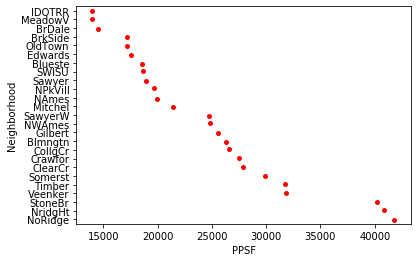

In [35]:
# ames_engineered['PPSF'] = ames_engineered['SalePrice'] / ames_engineered['Gr_Liv_Area']
ames_engineered['PPSF'] = ames_engineered['SalePrice'] / ames_engineered['GrLivArea']

data = pd.concat([ames_engineered.groupby('Neighborhood').mean()['PPSF']], axis = 1)

f, ax = plt.subplots()

sns.stripplot(data.sort_values(by='PPSF').PPSF, data.sort_values(by='PPSF').index, orient='h', color='red');

In [36]:
# Number_of_Neighborhood_Clusters = 4

# hood_means = data.sort_values(by='PPSF').PPSF

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=Number_of_Neighborhood_Clusters, random_state=42).fit(hood_means.values.reshape(-1, 1))

# hood_clusters = pd.concat([hood_means, pd.Series(kmeans.labels_, index=hood_means.index, name='Cluster')], axis = 1)

# def neighborhood_to_cluster(neigh_string):
#     return int(hood_clusters[ hood_clusters.index==neigh_string ]['Cluster'].values)

# ames_engineered['Neighborhood'] =  ames_engineered['Neighborhood'].apply(neighborhood_to_cluster)

# ppsf_dict = ames_engineered.groupby('Neighborhood_cluster')['PPSF'].agg('mean').to_dict()

# ames_engineered['N_PPSF'] = ames_engineered['Neighborhood_cluster'].map(ppsf_dict)

# ames_engineered['SP_Guess'] = ames_engineered['N_PPSF'] * ames_engineered['Gr_Liv_Area']


In [37]:
## Change Neighborhood to Neighborhood_Rank

ames_engineered['AvgPsqft'] = ames_engineered['Neighborhood'].map(data.to_dict()['PPSF'])
# ames_engineered['AAvg_Psqft_Rank'] = ames_engineered['Avg_Psqft'].rank() 

# # high level - valuecounts by neighborhood and average price per sq ft by neighborhood
ames_nbhood_count = pd.DataFrame(ames_engineered['Neighborhood'].value_counts()).rename(columns = {'Neighborhood' : 'NbhoodCount'})
ames_nbhood_stat = ames_engineered.groupby('Neighborhood').agg({'GrLivArea' : 'sum', 'SalePrice' : 'sum'})
ames_nbhood = pd.concat([ames_nbhood_count, ames_nbhood_stat], axis = 1)
ames_nbhood['AvgPsqft'] = ames_nbhood['SalePrice'] /  ames_nbhood['GrLivArea']
ames_nbhood['AvgPsqftRank'] = ames_nbhood['AvgPsqft'].rank()

n_ppsf_rank = ames_nbhood[['AvgPsqftRank']].to_dict()['AvgPsqftRank']
ames_engineered['NeighborhoodRank'] = ames_engineered['Neighborhood'].map(n_ppsf_rank)

ames_engineered.drop(['PPSF', 'AvgPsqft', 'Neighborhood'], axis=1, inplace=True)


Apply neighborhood cluster update to Test set

In [38]:
ames_engineered_test['NeighborhoodRank'] = ames_engineered_test['Neighborhood'].map(n_ppsf_rank)
ames_engineered_test.drop('Neighborhood', axis=1, inplace=True)

## Feature Generation

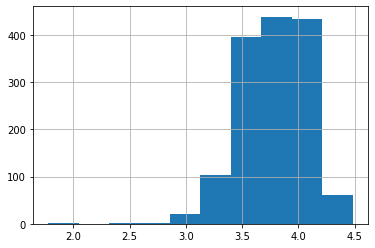

In [39]:
(np.log(ames_engineered['GrLivArea'] * ames_engineered['OverallQual'])).hist()
# np.log(ames_engineered['GrLivArea']).hist()

In [40]:
ames_engineered['NeighborhoodRank'] = ames_engineered['NeighborhoodRank'] ** 0.5
ames_engineered_test['NeighborhoodRank'] = ames_engineered_test['NeighborhoodRank'] ** 0.5

ames_engineered['OQ_x_NR'] = ames_engineered['OverallQual'] * ames_engineered['NeighborhoodRank']
ames_engineered_test['OQ_x_NR'] = ames_engineered_test['OverallQual'] * ames_engineered_test['NeighborhoodRank']

ames_engineered['OQ_x_TR'] = ames_engineered['OverallQual'] * ames_engineered['TotRmsAbvGrd'] ** 0.5
ames_engineered_test['OQ_x_TR'] = ames_engineered_test['OverallQual'] * ames_engineered_test['TotRmsAbvGrd'] ** 0.5

# ames_engineered['YearRemodAdd'] = 0 - (ames_engineered['YrSold'] - ames_engineered['YearRemodAdd'])
# ames_engineered_test['YearRemodAdd'] = 0 - (ames_engineered_test['YrSold'] - ames_engineered_test['YearRemodAdd'])

# ames_engineered['OQ_x_GLA'] = (np.log(ames_engineered['GrLivArea'] * ames_engineered['OverallQual']))
# ames_engineered_test['OQ_x_GLA'] = (np.log(ames_engineered_test['GrLivArea'] * ames_engineered_test['OverallQual']))

# ames_engineered['OC_x_NR'] = ames_engineered['OverallCond'] * ames_engineered['NeighborhoodRank']
# ames_engineered_test['OC_x_NR'] = ames_engineered_test['OverallCond'] * ames_engineered_test['NeighborhoodRank']

# ames_engineered['LA_x_NR'] = np.log(ames_engineered['LotArea']) * ames_engineered['NeighborhoodRank']
# ames_engineered_test['OLA_x_NR'] = np.log(ames_engineered_test['LotArea']) * ames_engineered_test['NeighborhoodRank']

# ames_engineered['GLA_x_NR'] = ames_engineered['GrLivArea'] * ames_engineered['NeighborhoodRank'] ** 2
# ames_engineered_test['GLA_x_NR'] = ames_engineered_test['GrLivArea'] * ames_engineered_test['NeighborhoodRank'] ** 2

# ames_engineered['Garage_Area_Cars'] = ames_engineered['GarageArea'] * ames_engineered['GarageCars'] ** 0.5
# ames_engineered_test['Garage_Area_Cars'] = ames_engineered_test['GarageArea'] * ames_engineered_test['GarageCars'] ** 0.5

# ames_engineered['TotalBsmtSF'] = ames_engineered['TotalBsmtSF'].replace(0, 1)
# ames_engineered_test['TotalBsmtSF'] = ames_engineered_test['TotalBsmtSF'].replace(0, 1)

# ames_engineered['BsmtRatio'] = ames_engineered['BsmtFinSF1'] / ames_engineered['TotalBsmtSF']
# ames_engineered_test['BsmtRatio'] = ames_engineered_test['BsmtFinSF1'] / ames_engineered_test['TotalBsmtSF']

# ames_engineered['Fireplaces'] = ames_engineered['Fireplaces'] * ames_engineered['FireplaceQu']
# ames_engineered_test['Fireplaces'] = ames_engineered_test['Fireplaces'] * ames_engineered_test['FireplaceQu']

# ames_engineered['Baths'] = ames_engineered['FullBath'] + 0.5 * ames_engineered['HalfBath']
# ames_engineered_test['Baths'] = ames_engineered_test['FullBath'] + 0.5 * ames_engineered_test['HalfBath']

ames_engineered.drop(['OverallQual', 'NeighborhoodRank', 'TotRmsAbvGrd'], axis=1, inplace=True)
ames_engineered_test.drop(['OverallQual', 'NeighborhoodRank', 'TotRmsAbvGrd'], axis=1, inplace=True)


In [41]:
# (np.log(ames_engineered['GrLivArea'] * ames_engineered['NeighborhoodRank'] ** 2)).hist()
# ames_engineered['OQ_x_NR'].hist()

## Remove Area features if using Total Area

In [42]:
# ames_engineered.drop(['Gr_Liv_Area', 'Total_Bsmt_SF', 'Garage_Area'], axis=1, inplace=True)
# Ames_test.drop(['Gr_Liv_Area', 'Total_Bsmt_SF', 'Garage_Area'], axis=1, inplace=True)

## Apply Regression Models

Reassign ames_engineered to Ames_train

In [43]:
kr_train_trimmed = ames_engineered.copy()
kr_test_trimmed = ames_engineered_test.copy()

In [44]:
Ames_train_final = kr_train_trimmed.copy()
Ames_test_final = kr_test_trimmed.copy()

Ames_target_train_final = Ames_train_final['SalePrice']

Ames_train_final = Ames_train_final.drop(['SalePrice'], axis=1)

Ames_target_train_final = np.log(Ames_target_train_final)


In [45]:
lasso = Lasso()

In [46]:
from sklearn.model_selection import GridSearchCV, KFold

kf5 = KFold(n_splits = 5, shuffle = True)

In [47]:
Ames_train_final.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,NumberStories,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,HasGarage,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Grvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofMatl_ClyTile,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2010,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OQ_x_NR,OQ_x_TR
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,10.427530,0.0,0.0,0.0,3.0,2.0,5,2003,2003,196.0,16.0,9.0,16.0,9.0,1.0,6.0,706,1.0,0,20.452663,198.284295,25.0,1.0,5.219622,854,0,7.600483,1,0,2,1,3,1,16.0,0.0,0,0.0,0.936937,2.0,2,548,9.0,9.0,2.0,0,61,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,28.861739,19.798990
2,80.0,10.596444,0.0,0.0,0.0,3.0,1.0,8,1976,1976,0.0,9.0,9.0,16.0,9.0,4.0,5.0,978,1.0,0,28.330978,264.601145,25.0,1.0,5.442275,0,0,7.284379,0,1,2,0,3,1,9.0,0.0,1,9.0,0.693694,2.0,2,460,9.0,9.0,2.0,298,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Ames_train_final)
Ames_train_final_standardized = scaler.transform(Ames_train_final)

In [49]:
lasso = Lasso(max_iter = 2000, tol=0.1)
en = ElasticNet(max_iter = 2000, tol=0.1)

# params_lasso = [ {'alpha':[1e-4, 1e-3, 1e-2, 1e-1, 1, 10]} ]
params_en = [ {'alpha':[1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
              'l1_ratio':[.25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85]} ]

kf5 = KFold(n_splits = 5, shuffle = True)

# grid_lasso = GridSearchCV(estimator = lasso, param_grid = params_lasso, cv = 5)
grid_en = GridSearchCV(estimator = en, param_grid = params_en, cv = 5)

# grid_lasso.fit(Ames_train_final_standardized, Ames_target_train_final)
grid_en.fit(Ames_train_final_standardized, Ames_target_train_final)

# print(f'Best Lasso Score: {grid_lasso.best_score_}')
print(f'Best ElasticNet Score: {grid_en.best_score_}')


Best ElasticNet Score: 0.9003160600697374


In [50]:
# best_model = grid_lasso.best_estimator_
best_model = grid_en.best_estimator_

In [51]:
# best_model.score(Ames_test_final, Ames_target_test_final)

In [52]:
best_model

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=2000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.1, warm_start=False)

In [53]:
# grid_lasso.best_params_
grid_en.best_params_

{'alpha': 0.01, 'l1_ratio': 0.7}

In [54]:
print('The intercept is %.4f' %(best_model.intercept_))
lassoCoef = pd.Series(best_model.coef_, index=Ames_train_final.columns)
print('The slopes are %s' %(lassoCoef))

The intercept is 12.0241
The slopes are LotFrontage       0.000000
LotArea           0.017163
Alley             0.000000
LotShape         -0.000000
LandContour      -0.000000
                    ...   
MSSubClass_160   -0.000000
MSSubClass_180   -0.000000
MSSubClass_190   -0.000000
OQ_x_NR           0.103723
OQ_x_TR           0.003037
Length: 200, dtype: float64


In [55]:
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
sortedCoefs[sortedCoefs > 0]

OQ_x_NR                  0.103723
GrLivArea                0.089499
1stFlrSF                 0.052194
OverallCond              0.039276
RoofMatl_ClyTile         0.033147
KitchenQual              0.032890
2ndFlrSF                 0.028058
GarageCars               0.026991
MSZoning_C (all)         0.023345
TotalBsmtSF              0.018333
Functional               0.018122
BsmtQual                 0.017919
BsmtFinSF1               0.017284
LotArea                  0.017163
Condition2_PosN          0.014380
GarageArea               0.013872
SaleType_New             0.013712
KitchenAbvGr             0.013231
SaleCondition_Abnorml    0.013149
GarageFinish             0.012494
GarageYrBlt              0.011853
HeatingQC                0.011789
FireplaceQu              0.011417
BsmtExposure             0.011153
FullBath                 0.010119
BsmtFullBath             0.010039
Fireplaces               0.009743
CentralAir               0.009021
BsmtFinType1             0.008892
Condition1_Art

In [58]:
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor(min_samples_leaf=1)

In [59]:
# from sklearn import ensemble

# randomForest = ensemble.RandomForestRegressor()

# randomForest.set_params(random_state=0)

# randomForest.fit(Ames_train_final, Ames_target_train_final) 

# print("The training error is: %.5f" % (randomForest.score(Ames_train_final, Ames_target_train_final)))
# print("The test     error is: %.5f" % (randomForest.score(Ames_test_final, Ames_target_test_final)))

In [60]:
# from sklearn.model_selection import cross_val_score

# # set the parameter grid
# grid_para_forest = {
#     'max_depth': [1, 5, 10, 15, 20],
#     'n_estimators': range(10, 110, 10)
# }


# # , n_jobs=-1
# # Above parameter caused memory errors

# grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5)
# # grid_search_forest = cross_val_score(randomForest, Ames_train_final, Ames_target_train_final, fit_params = grid_para_forest, scoring='accuracy', cv=5)
# %time grid_search_forest.fit(Ames_train_final, Ames_target_train_final)
# # Took 3m 13s last run


In [61]:
# set the parameter grid
grid_para_forest = {
    'max_depth': [35, 40, 45],
    'n_estimators': range(80, 100, 10)
}

grid_search_forest2 = GridSearchCV(randomForest, grid_para_forest, cv=5)
%time grid_search_forest2.fit(Ames_train_final, Ames_target_train_final)
# Took 0m 47s last run


CPU times: user 44.9 s, sys: 292 ms, total: 45.2 s
Wall time: 44.9 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [62]:
# get the best parameters
# grid_search_forest.best_params_
grid_search_forest2.best_params_

{'max_depth': 35, 'n_estimators': 90}

In [63]:
# get the best score
# grid_search_forest.best_score_
grid_search_forest2.best_score_

0.8797543507462183

In [64]:
# Get most important features
# tree_final = grid_search_forest.best_estimator_
tree_final = grid_search_forest2.best_estimator_
feature_importance = tree_final.feature_importances_
feature_importance = list(zip(Ames_train_final.columns, feature_importance))

feature_importance.sort(key = lambda x: x[1], reverse = True)
feature_importance

[('OQ_x_NR', 0.6176891509249758),
 ('OQ_x_TR', 0.11850215990305155),
 ('GrLivArea', 0.07389286300946486),
 ('TotalBsmtSF', 0.026121396636815262),
 ('BsmtFinSF1', 0.017225227499572573),
 ('1stFlrSF', 0.014820268417359056),
 ('GarageArea', 0.010954864636427083),
 ('LotArea', 0.008291130567894888),
 ('CentralAir', 0.006563142798781137),
 ('OverallCond', 0.006254875274987722),
 ('BsmtUnfSF', 0.005953147234631146),
 ('YearRemodAdd', 0.005336444954144862),
 ('2ndFlrSF', 0.005326372534560058),
 ('GarageYrBlt', 0.0046342629109094625),
 ('YearBuilt', 0.004441705868690062),
 ('OpenPorchSF', 0.004375892409307584),
 ('LotFrontage', 0.003898929290565818),
 ('KitchenQual', 0.0034725193294392965),
 ('BsmtFinType1', 0.003216173167433043),
 ('WoodDeckSF', 0.0029647817040264813),
 ('GarageFinish', 0.0024768109875298867),
 ('MasVnrArea', 0.0021937796519011185),
 ('GarageCars', 0.0020902681099085976),
 ('FireplaceQu', 0.0018863494446333356),
 ('EnclosedPorch', 0.0018626730994204582),
 ('BsmtCond', 0.00178

In [65]:
col, imp = zip(*feature_importance)

cols_to_use = list(col[0:31])


In [66]:
# cols_to_use = ['Overall_Qual', 'GLA_x_NR', 'Garage_Area', 'Total_Bsmt_SF', '1st_Flr_SF', 'Garage_Cars', 'Overall_Cond', 'Bsmt_Qual', 'BsmtFin_SF_1']

# set the parameter grid
grid_para_forest = {
    'max_depth': [25, 30, 35, 40],
    'n_estimators': range(80, 110, 10)
}

gsf_limited_col = GridSearchCV(randomForest, grid_para_forest, cv=5)
%time gsf_limited_col.fit(Ames_train_final[cols_to_use], Ames_target_train_final)
# Took 52s last run


CPU times: user 47.7 s, sys: 363 ms, total: 48.1 s
Wall time: 48.3 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [67]:
print(gsf_limited_col.best_params_)
print(gsf_limited_col.best_score_)

tree_final = gsf_limited_col.best_estimator_
feature_importance = tree_final.feature_importances_
feature_importance = list(zip(cols_to_use, feature_importance))

feature_importance.sort(key = lambda x: x[1], reverse = True)
feature_importance

{'max_depth': 25, 'n_estimators': 90}
0.8809687710665


[('OQ_x_NR', 0.619489528185984),
 ('OQ_x_TR', 0.11930204034000857),
 ('GrLivArea', 0.07765620963944414),
 ('TotalBsmtSF', 0.029148040700386894),
 ('BsmtFinSF1', 0.016786564198328104),
 ('1stFlrSF', 0.01587782070960548),
 ('GarageArea', 0.013713133288635927),
 ('LotArea', 0.010959419681652642),
 ('OverallCond', 0.008666827274712584),
 ('BsmtUnfSF', 0.007546905274332982),
 ('YearRemodAdd', 0.006843636709933196),
 ('GarageYrBlt', 0.006552452843325525),
 ('2ndFlrSF', 0.0062107944072432),
 ('YearBuilt', 0.006074101956416603),
 ('OpenPorchSF', 0.00565934889370428),
 ('LotFrontage', 0.005041776604814377),
 ('CentralAir', 0.004817409711478475),
 ('KitchenQual', 0.0042207585263982095),
 ('BsmtFinType1', 0.004163565077838443),
 ('WoodDeckSF', 0.003967560957790597),
 ('GarageFinish', 0.003489527408249543),
 ('FireplaceQu', 0.0031283838191570805),
 ('MasVnrArea', 0.0028270748449944396),
 ('EnclosedPorch', 0.002580472509962939),
 ('GarageQual', 0.002463728521093074),
 ('HeatingQC', 0.00236791922428

In [68]:
np.exp(tree_final.predict(Ames_test_final[cols_to_use]))

array([135712.55588705, 140665.46938265, 149797.86433026, ...,
       139531.11065396, 122938.00688173, 216298.75500601])

In [69]:
answers = pd.DataFrame(list(zip(Ames_test_final.index, np.exp(tree_final.predict(Ames_test_final[cols_to_use])))))

# answers.set_index(0, inplace = True)

answers.columns = ['Id', 'SalePrice']

answers


,Id,SalePrice
0,1461,135712.555887
1,1462,140665.469383
2,1463,149797.864330
3,1464,152512.367253
4,1465,210713.956754
...,...,...
1454,2915,88020.586475
1455,2916,87443.550567
1456,2917,139531.110654
1457,2918,122938.006882


In [70]:
answers.to_csv(r'../../NYCDSA/Project 3 - Machine Learning/data/submission_rf.csv', index = False)

In [72]:
scaler.fit(Ames_test_final)
Ames_test_final_standardized = scaler.transform(Ames_test_final)

In [73]:
ln_price = best_model.predict(Ames_test_final_standardized)

np.exp(ln_price)

array([122433.38162012, 164365.55030403, 181021.90839741, ...,
       184585.52152102, 112600.89193054, 205840.03203618])

In [74]:
answers_en = pd.DataFrame(list(zip(Ames_test_final.index, np.exp(ln_price))))

answers_en.columns = ['Id', 'SalePrice']

answers_en


,Id,SalePrice
0,1461,122433.381620
1,1462,164365.550304
2,1463,181021.908397
3,1464,201275.555774
4,1465,199334.558425
...,...,...
1454,2915,79348.483711
1455,2916,81818.080217
1456,2917,184585.521521
1457,2918,112600.891931


In [75]:
print(min(answers['SalePrice'] - answers_en['SalePrice']))
print(max(answers['SalePrice'] - answers_en['SalePrice']))

answers - answers_en

-289939.61796561605
103501.37777570618


,Id,SalePrice
0,0,13279.174267
1,0,-23700.080921
2,0,-31224.044067
3,0,-48763.188521
4,0,11379.398330
...,...,...
1454,0,8672.102764
1455,0,5625.470349
1456,0,-45054.410867
1457,0,10337.114951


In [76]:
answers_en.to_csv(r'../../NYCDSA/Project 3 - Machine Learning/data/submission_en.csv', index = False)

## Results Exploration

In [77]:
Ames_train_final['KitchenQual'].value_counts()

9.0     735
16.0    586
25.0    100
4.0      39
Name: KitchenQual, dtype: int64

In [78]:
Ames_test_final['KitchenQual'].value_counts()

9.0     758
16.0    565
25.0    105
4.0      31
Name: KitchenQual, dtype: int64

In [128]:
vals = [4, 9, 16, 25]
val_reshape = np.array(vals).reshape(-1, 1)

tst = StandardScaler()
tst.fit(val_reshape)
tst.transform(val_reshape)

array([[-1.20407608],
       [-0.57035183],
       [ 0.31686213],
       [ 1.45756578]])

In [129]:
it = best_model.intercept_
cf = lassoCoef['KitchenQual']

print('Ex : ' + str(np.exp(it + cf * 1.45756578)))
print('Gd : ' + str(np.exp(it + cf * 0.31686213)))
print('NA : ' + str(np.exp(it)))
print('TA : ' + str(np.exp(it + cf * -0.57035183)))
print('Fa : ' + str(np.exp(it + cf * -1.20407608)))

Ex : 174903.57407973232
Gd : 168463.17607863186
NA : 166716.64288689764
TA : 163618.38681826682
Fa : 160243.36304201974


In [122]:
kr_train['1stFlrSF'].agg('mean')

1162.626712328767